# Hypothesis Testing
To find out if there is a statistical difference in the mean number of views between videos posted by verified accounts versus unverified accounts.

## Import packages

In [21]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Import packages for statistical analysis/hypothesis testing
from scipy import stats

## Load dataset

In [22]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

## Data exploration

In [23]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [43]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.6+ MB


In [42]:
# Generate a table of descriptive statistics about the data
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [24]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [44]:
# Check for duplicates
data.duplicated().sum()

0

In [25]:
# Drop rows with missing values
data = data.dropna()

In [26]:
# Compute the mean `video_view_count` for each group in `verified_status`
data.groupby(['verified_status']).mean()[['video_view_count']]

<ipython-input-26-0e9ceb49e5ff>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['verified_status']).mean()[['video_view_count']]


,video_view_count
verified_status,
not verified,265663.785339
verified,91439.164167


## Hypothesis testing

$H_0$: There is no difference in the mean number of views between videos posted by verified accounts versus unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

$H_1$: There is a statistical difference in the mean number of views between videos posted by verified accounts versus unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

Significance level: 5%

In [27]:
# Conduct a two-sample t-test to compare means
verified = data[data['verified_status'] == 'verified']['video_view_count']
not_verified = data[data['verified_status'] == 'not verified']['video_view_count']
stats.ttest_ind(a = verified, b = not_verified, equal_var = False)

TtestResult(statistic=-25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

Since the p-value is much smaller than the significance level of 5%, we reject the null hypothesis. There is a statistically significant difference in the mean number of views between videos posted by verified accounts versus unverified accounts.

This suggests there might be fundamental behavioural differences between these two groups of accounts and would be interesting to investigate the root cause of this.

We should build a regression model for verified_status next to help analyse user behaviour in the different groups of users.

# Logistic Regression

## Import packages

In [28]:
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data exploration

In [29]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

## Check for and handle outliers

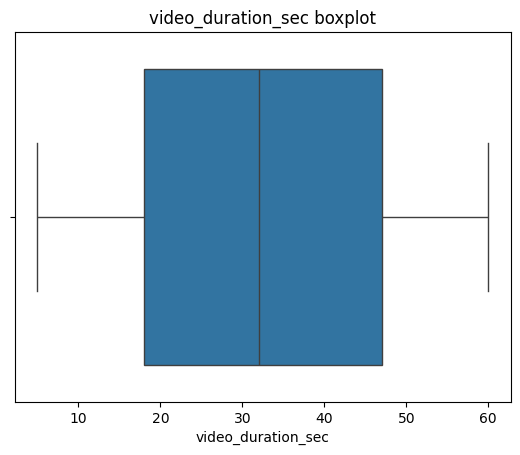

In [31]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.title('video_duration_sec boxplot')
sns.boxplot(x = data['video_duration_sec']);

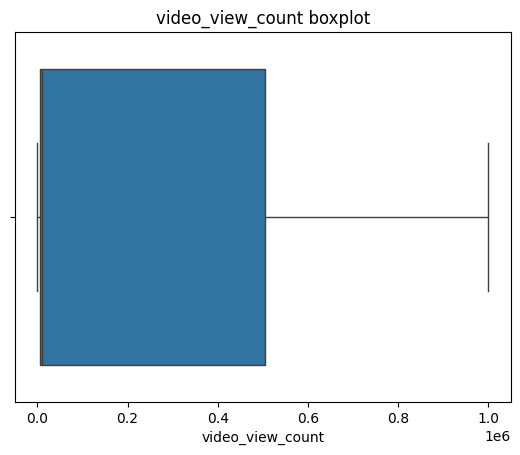

In [32]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.title('video_view_count boxplot')
sns.boxplot(x = data['video_view_count']);

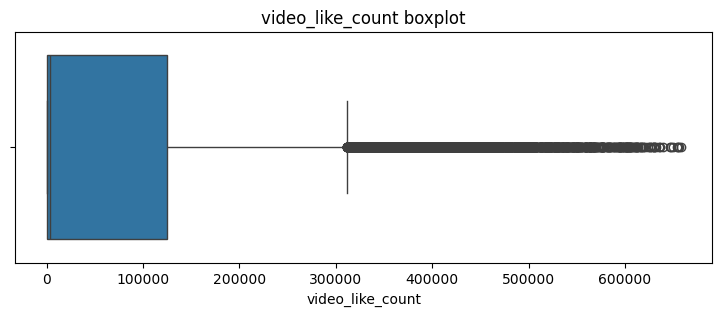

In [39]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(9,3))
plt.title('video_like_count boxplot')
sns.boxplot(x = data['video_like_count']);

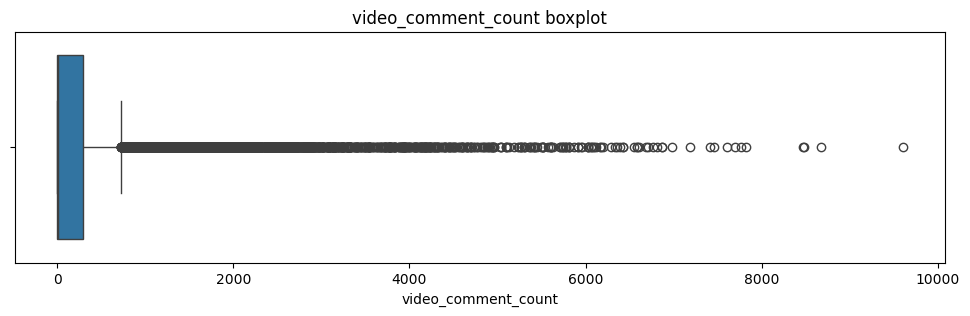

In [46]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(12,3))
plt.title('video_comment_count boxplot')
sns.boxplot(x = data['video_comment_count']);

In [41]:
# Check for and handle outliers for video_like_count
perc25 = data['video_like_count'].quantile(0.25)
perc75 = data['video_like_count'].quantile(0.75)
iqr = perc75 - perc25
upper_limit = perc75 + 1.5*iqr
lower_limit = perc25 - 1.5*iqr
data[data['video_like_count'] > upper_limit]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
12,13,claim,3609761483,51,someone shared with me that the longest record...,not verified,active,700081.0,434565.0,97995.0,2408.0,1411.0
13,14,claim,3850678773,20,someone shared with me that 1920 was the last ...,not verified,under review,929685.0,497236.0,154917.0,1225.0,805.0
27,28,claim,6569363811,22,someone shared with me that sneezing while tra...,not verified,under review,812056.0,329068.0,3515.0,5200.0,1108.0
28,29,claim,6301836558,21,someone shared with me that people don’t sneez...,not verified,active,677855.0,332569.0,97961.0,5531.0,2386.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9586,9587,claim,3469997668,7,a colleague discovered on the radio a claim th...,not verified,active,931007.0,455662.0,164314.0,10216.0,6809.0
9587,9588,claim,4032914023,58,a colleague discovered on the radio a claim th...,not verified,banned,706385.0,456631.0,174090.0,9027.0,5300.0
9597,9598,claim,9440207084,33,a colleague discovered on the radio a claim th...,not verified,active,885151.0,568550.0,79845.0,9700.0,2875.0
9603,9604,claim,3883493316,49,a colleague discovered on the radio a claim th...,not verified,active,737177.0,460743.0,54550.0,8119.0,3372.0


## Check class balance

In [47]:
# Check class balance for verified_status
data['verified_status'].value_counts(normalize = True)*100

not verified    93.71201
verified         6.28799
Name: verified_status, dtype: float64

Approximately 93.7% of the dataset is represented by videos posted by 'not verified' accounts while only about 6.3% is represented by videos posted by 'verified' accounts.

There is class imbalance and resampling is needed to create class balance in the outcome variable.

### Resampling

In [48]:
# Identify data points from majority and minority classes
data_majority = data[data['verified_status'] == 'not verified']
data_minority = data[data['verified_status'] == 'verified']

In [49]:
# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace = True,                 
                                 n_samples = len(data_majority), 
                                 random_state = 0) 

In [50]:
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop = True)

In [51]:
# Display new class counts
data_upsampled['verified_status'].value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

Both counts should be the same.

## Feature transformation

In [52]:
# Get the average `video_transcription_text` length for verified and the average `video_transcription_text` length for not verified
data_upsampled[['verified_status', 'video_transcription_text']].groupby(by = 'verified_status')[['video_transcription_text']].agg(func = lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [76]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func = lambda text: len(text))

# Display first few rows of dataframe after adding new column
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


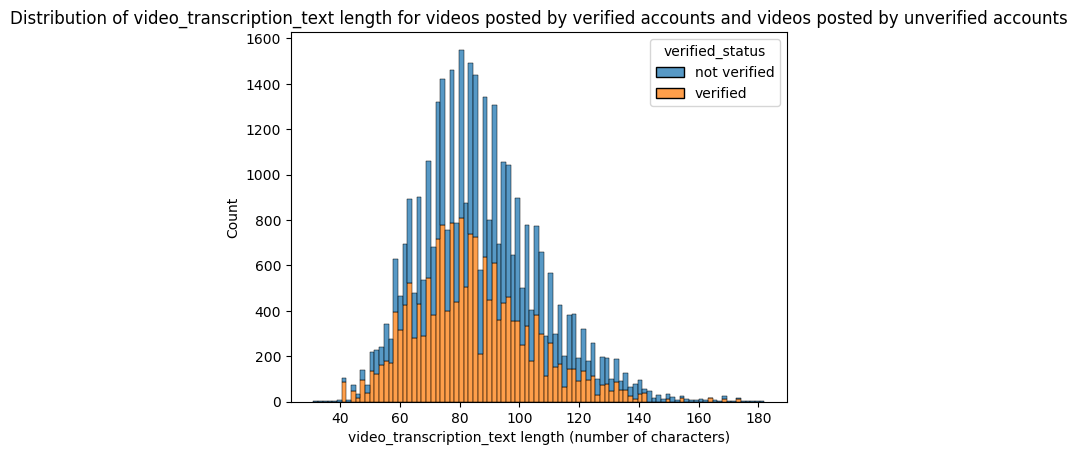

In [55]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and unverified accounts
# Create two histograms in one plot
sns.histplot(data = data_upsampled, stat = 'count', multiple  = 'stack', x = 'text_length', kde = False, hue = 'verified_status', legend = True)
plt.xlabel('video_transcription_text length (number of characters)')
plt.ylabel('Count')
plt.title('Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts')
plt.show()

## Examine correlations

In [56]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.corr(numeric_only = True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


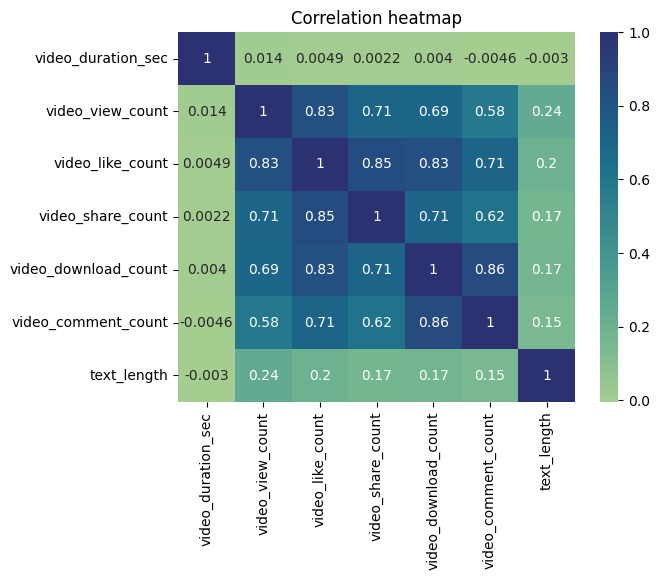

In [58]:
# Create a heatmap to visualize how correlated variables are
sns.heatmap(data_upsampled[['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count',
                            'video_download_count', 'video_comment_count', 'text_length']].corr(numeric_only=True),
                            annot = True, cmap = 'crest')
plt.title('Correlation heatmap')
plt.show()

## Select variables

In [79]:
# Select outcome variable
y = data_upsampled['verified_status']

# Select features
X = data_upsampled[['video_duration_sec', 'video_view_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'claim_status', 'author_ban_status']]

video_like_count has the most severe collinearity with the other features, thus is not selected as a feature.

## Split the dataset

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Get shape of each training and testing set
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((25037, 7), (10731, 7), (25037,), (10731,))

The number of rows for the training sets should match. Same for the testing sets.

The number of columns for the X sets should match.

## Encode training variables

In [63]:
# Check data types of features
X.dtypes

video_duration_sec        int64
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
claim_status             object
author_ban_status        object
dtype: object

In [64]:
# Get unique values in `claim_status`
X['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [65]:
# Get unique values in `author_ban_status`
X['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

Both claim_status and author_ban_status are of the object data type. They will have to be converted to numeric data type in order for it to work with sklearn. We will do this through one-hot encoding.

In [81]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop = 'first', sparse_output = False)

# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [70]:
# Display first few rows of encoded training features
X_train_encoded

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [82]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data = X_train_encoded,
                                  columns = X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [74]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped
X_train_drop = X_train.drop(['claim_status', 'author_ban_status'], axis = 1)
X_train_drop.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33627,38,9010.0,1340.0,76.0,24.0
32177,17,4458.0,111.0,6.0,2.0
17038,38,7496.0,542.0,19.0,5.0
91,37,436875.0,41775.0,4663.0,1947.0
25378,32,6725.0,138.0,15.0,4.0


In [83]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
X_train_final = pd.concat([X_train_drop.reset_index(drop = True), X_train_encoded_df], axis = 1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,38,9010.0,1340.0,76.0,24.0,1.0,0.0,0.0
1,17,4458.0,111.0,6.0,2.0,1.0,1.0,0.0
2,38,7496.0,542.0,19.0,5.0,1.0,0.0,0.0
3,37,436875.0,41775.0,4663.0,1947.0,0.0,1.0,0.0
4,32,6725.0,138.0,15.0,4.0,1.0,0.0,0.0


In [84]:
# Check data type of outcome variable
y.dtypes

dtype('O')

In [85]:
# Get unique values of outcome variable
y.unique()

array(['not verified', 'verified'], dtype=object)

The data type of the outcome variable is object. We will use one-hot encoding to change it to numeric.

In [86]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop = 'first', sparse_output = False)

In [87]:
# Encode the training outcome variable
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 0., ..., 0., 0., 0.])

## Build a model and fit it

In [88]:
# Construct a logistic regression model and fit it to the training set
clf = LogisticRegression(random_state = 42).fit(X_train_final, y_train_final)

## Encode testing variables

In [92]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[['claim_status', 'author_ban_status']]

# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [93]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data = X_test_encoded, columns = X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [94]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped
X_test_drop = X_test.drop(['claim_status', 'author_ban_status'], axis = 1)
X_test_drop.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
26849,12,2177.0,168.0,6.0,2.0
1227,43,862507.0,86137.0,3206.0,265.0
25467,13,7457.0,100.0,7.0,2.0
27310,6,6388.0,133.0,9.0,1.0
27560,34,4075.0,325.0,16.0,4.0


In [95]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
X_test_final = pd.concat([X_test_drop.reset_index(drop = True), X_test_encoded_df], axis = 1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,12,2177.0,168.0,6.0,2.0,1.0,0.0,0.0
1,43,862507.0,86137.0,3206.0,265.0,0.0,0.0,1.0
2,13,7457.0,100.0,7.0,2.0,1.0,0.0,0.0
3,6,6388.0,133.0,9.0,1.0,1.0,0.0,0.0
4,34,4075.0,325.0,16.0,4.0,1.0,0.0,0.0


## Model predictions

In [97]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = clf.predict(X_test_final)

# Display the predictions on the encoded testing set
y_pred

array([1., 0., 1., ..., 1., 0., 0.])

In [98]:
# Display the true labels of the testing set
y_test

26849        verified
1227     not verified
25467        verified
27310        verified
27560        verified
             ...     
16758    not verified
28583        verified
23163        verified
1580     not verified
7676     not verified
Name: verified_status, Length: 10731, dtype: object

In [99]:
# Encode the testing outcome variable
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 0., 1., ..., 1., 0., 0.])

Check for the alignment of number of rows and columns again since additional variables were added.

In [102]:
# Get shape of each training and testing set
(X_train_final.shape, X_test_final.shape, y_train_final.shape, y_test_final.shape)

((25037, 8), (10731, 8), (25037,), (10731,))

## Model results

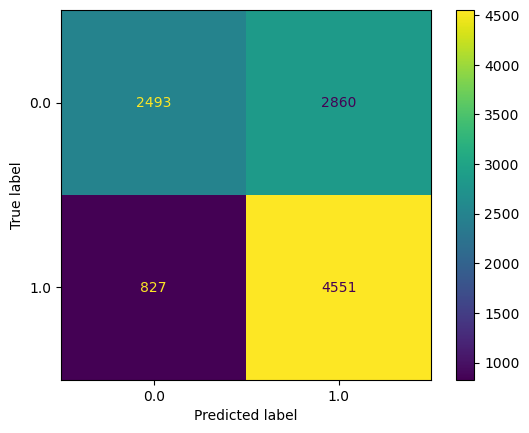

In [103]:
import sklearn.metrics as metrics

# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test_final, y_pred, labels = clf.classes_)

# Create display of confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Plot confusion matrix
disp.plot()

In [104]:
# Create a classification report
target_labels = ['verified', 'not verified']
print(classification_report(y_test_final, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.47      0.57      5353
not verified       0.61      0.85      0.71      5378

    accuracy                           0.66     10731
   macro avg       0.68      0.66      0.64     10731
weighted avg       0.68      0.66      0.64     10731



The logistic regression model achieved a precision of 61%, recall of 85%, f1-score of 71% and accuracy of 66% when predicting the 'not verified' class.

## Interpret model coefficients

In [106]:
# Get the feature names from the model and the model coefficients and place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":  clf.feature_names_in_, "Model Coefficient": clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.469428e-03
1,video_view_count,-2.340329e-06
2,video_share_count,7.419026e-06
3,video_download_count,-2.429907e-04
4,video_comment_count,4.138983e-04
5,claim_status_opinion,3.717740e-04
6,author_ban_status_banned,-1.614427e-05
7,author_ban_status_under review,8.562751e-07


video_duration_sec appears to be the most associated with higher odds of the user being verified. Each additional second of video results in a 0.0085 increase in the log-odds of the user being verified. Other features have small estimated model coefficients, suggesting small association with outcome variable verified_status.

The logistic model does not have very good precision and accuracy but has a high recall.